In [ ]:
## Beginning

In [1]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [3]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname = infodir + r'\data\buurten_filtered.csv'

gpdf01 = pd.read_csv(fname)
#this is to verify
gpdf01.head()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013


In [71]:
#here i am dropping all entries that do not have "doordeweeks avond" in "Dagdeel"
#and checking how many I have left
gpdf01_1 = gpdf01[gpdf01['Dagdeel'] == 'doordeweeks avond']
before = len(gpdf01)
after = len(gpdf01_1)
print(f"Rows before: {before}, after: {after}, dropped: {before - after}")

Rows before: 1447, after: 518, dropped: 929


In [30]:
#here i am purging all rows with "netto_pkd" and "bruto_pkd" higher than 150% because that looks like missing and damaged data
#that would otherwise interfere with our next process
gpdf01_2 = gpdf01_1[(gpdf01_1["Netto_PKD"] <= 150) & (gpdf01_1["Bruto_PKD"] <= 150)]
gpdf01_2 = gpdf01_2.sort_values(by=["Bruto_PKD", "Netto_PKD"], ascending=[False, False])
gpdf01_2.head(10)

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten
26,143.0,AE02 Oude Kerk e.o.,A,202301-202302,doordeweeks avond,8.0,7.0,2.0,0.0,9.0,88.0,112.0,"POLYGON((4.8994004 52.3747475,4.8992273 52.374...","POLYGON((52.3747475 4.8994004,52.3747876 4.899...",4.896203,52.373811,AE
97,384.0,TH04 K-buurt-Zuidwest,T,202406,doordeweeks avond,358.0,340.0,57.0,0.0,397.0,95.0,111.0,"POLYGON((4.9803772 52.3155975,4.9801227 52.315...","POLYGON((52.3155975 4.9803772,52.3155437 4.980...",4.979595,52.313042,TH
98,385.0,TH05 K-buurt-Zuidoost,T,202406,doordeweeks avond,327.0,302.0,46.0,0.0,348.0,92.0,106.0,"POLYGON((4.9859463 52.3173694,4.9854452 52.317...","POLYGON((52.3173694 4.9859463,52.3172527 4.985...",4.984753,52.314853,TH
87,374.0,TE03 G-buurt-Noord,T,202406,doordeweeks avond,320.0,306.0,29.0,0.0,335.0,96.0,105.0,"POLYGON((4.9714808 52.3253526,4.9706196 52.325...","POLYGON((52.3253526 4.9714808,52.3250574 4.970...",4.970181,52.323912,TE
89,376.0,TF02 Grunder/Koningshoef,T,202406,doordeweeks avond,425.0,416.0,24.0,0.0,440.0,98.0,104.0,"POLYGON((4.9769028 52.3238067,4.977699 52.3229...","POLYGON((52.3238067 4.9769028,52.3229333 4.977...",4.980608,52.321355,TF
157,563.0,EG02 GWL-terrein,E,202409-202410,doordeweeks avond,38.0,39.0,0.0,0.0,39.0,103.0,103.0,"POLYGON((4.8694074 52.3855428,4.8668659 52.385...","POLYGON((52.3855428 4.8694074,52.3854968 4.866...",4.868767,52.383811,EG
281,1032.0,FB07 Bakemabuurt,F,202409-202411,doordeweeks avond,533.0,513.0,24.0,0.0,537.0,96.0,101.0,"POLYGON((4.8093999 52.3793915,4.8094205 52.379...","POLYGON((52.3793915 4.8093999,52.379517 4.8094...",4.805575,52.378331,FB
70,357.0,TA03 Amstel III deel A/B-Noord,T,202406,doordeweeks avond,4.0,4.0,0.0,0.0,4.0,100.0,100.0,"POLYGON((4.9475058 52.3108069,4.9463557 52.312...","POLYGON((52.3108069 4.9475058,52.3120613 4.946...",4.946693,52.305855,TA
139,545.0,EB08 Zeeheldenbuurt,E,202409-202410,doordeweeks avond,212.0,205.0,7.0,0.0,212.0,97.0,100.0,"POLYGON((4.8856593 52.3907556,4.8855179 52.390...","POLYGON((52.3907556 4.8856593,52.3904709 4.885...",4.888207,52.389442,EB
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA


In [9]:
gpdf01_1["Wijken"] = gpdf01_1["BRT"].str[:2]
df_avg1 = gpdf01_1.groupby("Wijken", as_index=False).mean(numeric_only=True)
df_avg1.head(10)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\4049047171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]


,AA_buurten,OBJECTNUMMER,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,LNG,LAT
0,AA,119.500,137.000000,113.500000,3.000000,0.0,116.500000,82.333333,85.166667,4.887962,52.384230
1,AB,128.000,146.818182,121.727273,1.363636,0.0,123.090909,83.454545,84.818182,4.880027,52.374351
2,AC,135.500,230.250000,176.250000,0.250000,0.0,176.500000,79.750000,79.750000,4.887063,52.373264
3,AD,245.375,25.750000,17.750000,0.625000,0.0,18.375000,5581.500000,5582.000000,4.893645,52.374255
4,AE,184.800,19.400000,15.600000,1.600000,0.0,17.200000,1836.200000,1844.000000,4.896888,52.372574
5,AF,150.000,85.333333,60.000000,2.333333,0.0,62.333333,67.111111,69.888889,4.904784,52.371775
6,AG,157.500,145.500000,114.166667,0.666667,0.0,114.833333,73.500000,75.333333,4.892159,52.365177
7,AH,164.500,119.125000,97.500000,1.250000,0.0,98.750000,81.625000,82.750000,4.889498,52.362195
8,AJ,170.500,339.500000,244.750000,2.250000,0.0,247.000000,73.000000,73.500000,4.912912,52.363930
9,AK,176.500,238.375000,187.500000,0.625000,0.0,188.125000,78.000000,78.000000,4.923073,52.370187


In [37]:
gpdf01_2["Wijken"] = gpdf01_2["BRT"].str[:2]
df_avg2 = (
    gpdf01_2
    .groupby("Wijken", as_index=False)
    .agg({
        'SDC': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Periode': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Dagdeel': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Cap_open': 'mean',
        'Bez_open': 'mean',
        'Fout': 'mean',
        'Bez_tot': 'mean',
        'Netto_PKD': 'mean',
        'Bruto_PKD': 'mean',        
    })
)
df_avg2.head(10)

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
0,AA,A,202403-202404,doordeweeks avond,137.000000,113.500000,3.000000,116.500000,82.333333,85.166667
1,AB,A,202403-202404,doordeweeks avond,146.818182,121.727273,1.363636,123.090909,83.454545,84.818182
2,AC,A,202403-202404,doordeweeks avond,230.250000,176.250000,0.250000,176.500000,79.750000,79.750000
3,AD,A,202403-202404,doordeweeks avond,68.666667,47.333333,1.000000,48.333333,70.666667,72.000000
4,AE,A,202403-202404,doordeweeks avond,24.250000,19.500000,2.000000,21.500000,73.250000,83.000000
5,AF,A,202403-202404,doordeweeks avond,85.333333,60.000000,2.333333,62.333333,67.111111,69.888889
6,AG,A,202403-202404,doordeweeks avond,145.500000,114.166667,0.666667,114.833333,73.500000,75.333333
7,AH,A,202403-202404,doordeweeks avond,119.125000,97.500000,1.250000,98.750000,81.625000,82.750000
8,AJ,A,202403-202404,doordeweeks avond,339.500000,244.750000,2.250000,247.000000,73.000000,73.500000
9,AK,A,202403-202404,doordeweeks avond,238.375000,187.500000,0.625000,188.125000,78.000000,78.000000


In [38]:
df_avg2s0 = df_avg2.sort_values(by=["Bruto_PKD", "Fout"], ascending=[True, False])
df_avg2s0.head(10)

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
11,BB,B,202406,doordeweeks avond,77.200000,7.800000,0.000000,7.800000,9.800000,9.800000
12,EA,E,202409-202410,doordeweeks avond,616.666667,74.333333,1.333333,75.666667,14.333333,14.666667
10,BA,B,202406,doordeweeks avond,105.500000,19.666667,1.333333,21.000000,17.833333,19.333333
72,MK,M,202501-202503,doordeweeks avond,168.000000,21.500000,1.500000,23.000000,19.500000,21.000000
107,TK,T,202406,doordeweeks avond,191.333333,34.000000,2.000000,36.000000,22.333333,24.000000
59,KN,K,202502-202503,doordeweeks avond,1096.000000,329.000000,1.000000,330.000000,30.000000,30.000000
70,MH,M,202501-202503,doordeweeks avond,158.666667,65.333333,1.166667,66.500000,29.500000,30.166667
62,KR,K,202502-202503,doordeweeks avond,1254.250000,483.750000,4.250000,488.000000,31.750000,32.000000
37,FF,F,202409-202411,doordeweeks avond,391.666667,122.666667,3.666667,126.333333,29.000000,32.000000
61,KQ,K,202502-202503,doordeweeks avond,1178.500000,552.166667,7.833333,560.000000,32.833333,33.166667


In [39]:
df_avg2s1 = df_avg2.sort_values(by=["Bruto_PKD", "Fout"], ascending=[False, True])
df_avg2s1.head(10)

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
102,TE,T,202406,doordeweeks avond,720.666667,622.000000,48.000000,670.000000,88.666667,97.000000
52,KF,K,202502-202503,doordeweeks avond,399.000000,374.750000,3.000000,377.750000,94.250000,94.750000
105,TH,T,202406,doordeweeks avond,390.600000,333.000000,30.200000,363.200000,84.400000,94.600000
35,FD,F,202409-202411,doordeweeks avond,707.750000,594.250000,51.750000,646.000000,84.000000,91.500000
25,EP,E,202409-202410,doordeweeks avond,244.000000,213.500000,4.500000,218.000000,87.000000,89.000000
104,TG,T,202406,doordeweeks avond,542.666667,461.666667,12.666667,474.333333,85.333333,87.666667
24,EN,E,202409-202410,doordeweeks avond,205.000000,178.250000,0.500000,178.750000,86.500000,86.750000
29,ET,E,202409-202410,doordeweeks avond,608.500000,517.500000,2.000000,519.500000,86.500000,86.500000
17,EF,E,202409-202410,doordeweeks avond,587.000000,498.000000,2.500000,500.500000,86.500000,86.500000
26,EQ,E,202409-202410,doordeweeks avond,737.000000,631.000000,5.000000,636.000000,86.000000,86.000000


In [ ]:
#comparing these two results, the neighborhoods where we should focus for our surveys, at this moment, are:
#BB and TE
#however, we need to add the criteria for green area and other variables before confirming this decision
#highlighting in our histogram

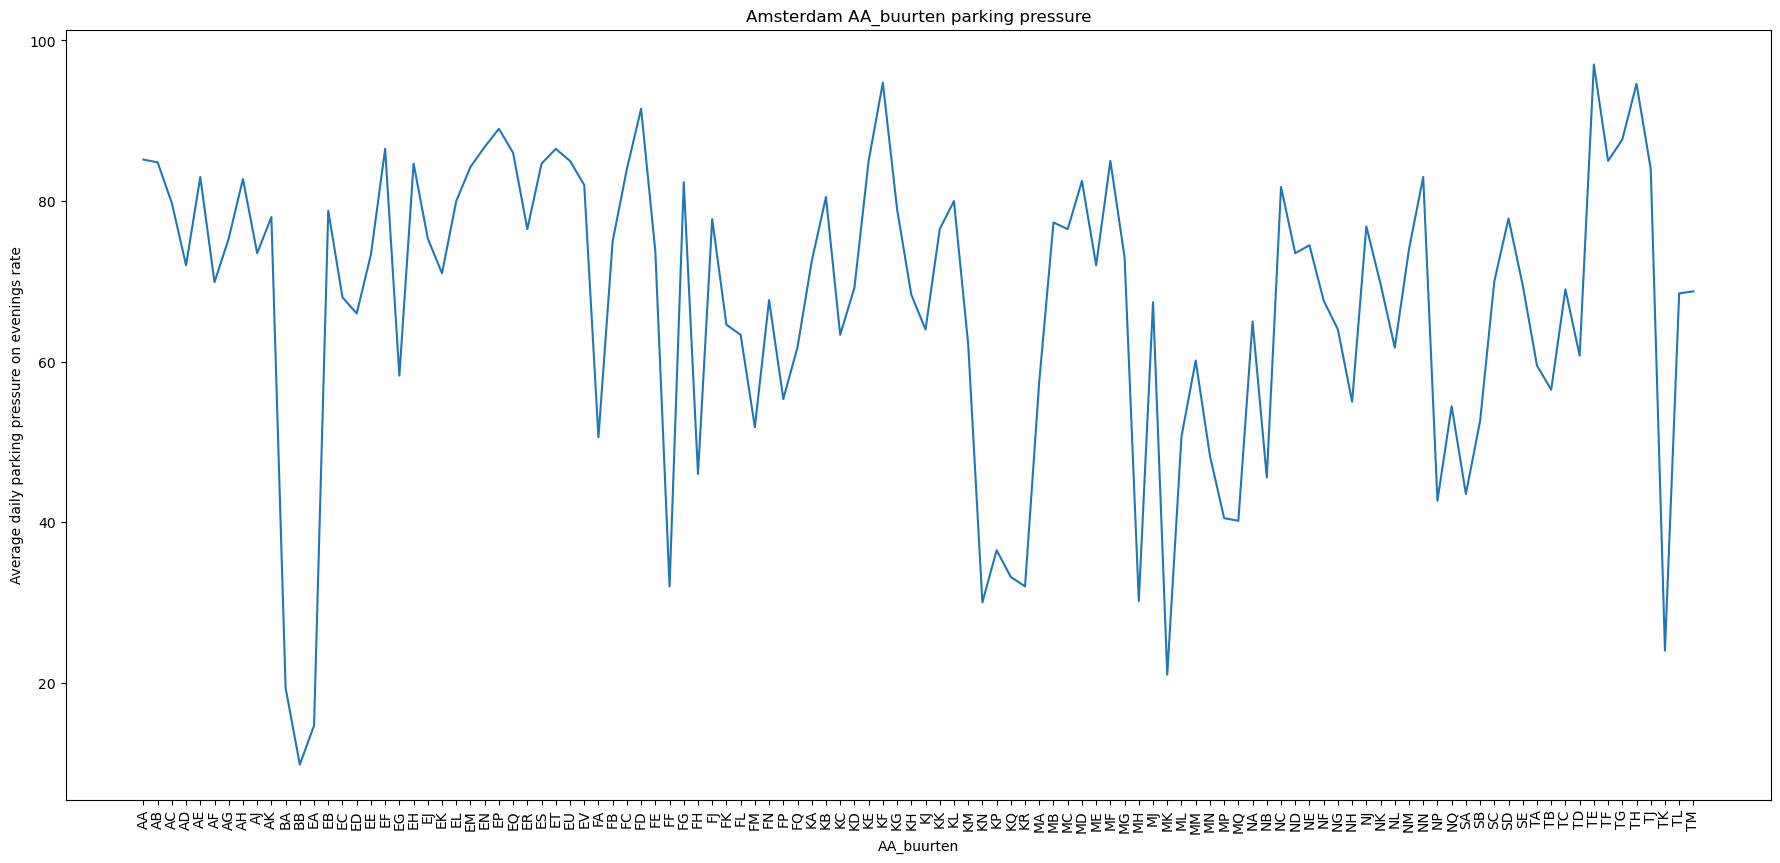

In [46]:
plt.figure(figsize=(22,10))
plt.plot(df_avg2["Wijken"], df_avg2["Bruto_PKD"])
plt.xlabel("Wijken")
plt.xticks(rotation=90)
plt.ylabel("Average daily parking pressure on evenings rate")
plt.title("Amsterdam Wijken parking pressure")
plt.show()

In [40]:
display(df_avg2.describe(include="all"))
df_avg2.isna().sum()

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
count,110,110,110,110,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
unique,110,9,8,1,NaN,NaN,NaN,NaN,NaN,NaN
top,AA,E,202409-202410,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,20,20,110,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,521.197096,353.030866,9.581811,362.612677,65.160588,67.047126
std,NaN,NaN,NaN,NaN,339.133906,238.983936,14.076813,247.718529,18.560331,18.747098
min,NaN,NaN,NaN,NaN,24.250000,7.800000,0.000000,7.800000,9.800000,9.800000
25%,NaN,NaN,NaN,NaN,254.375000,169.762500,1.750000,176.875000,56.784091,58.562500
50%,NaN,NaN,NaN,NaN,432.839286,325.500000,4.375000,329.500000,70.500000,71.500000
75%,NaN,NaN,NaN,NaN,705.979167,495.312500,10.175000,502.250000,79.100000,81.437500


AA_buurten    0
SDC           0
Periode       0
Dagdeel       0
Cap_open      0
Bez_open      0
Fout          0
Bez_tot       0
Netto_PKD     0
Bruto_PKD     0
dtype: int64

In [ ]:
lt.figure()
plt.plot(df_avg2["Periode"], df_avg2["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [13]:
gpdf01_1["Periode"].dtype

dtype('O')

In [14]:
gpdf01_1["Periode"] = gpdf01["Periode"].fillna("").astype(str)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\1587416296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["Periode"] = gpdf01["Periode"].fillna("").astype(str)


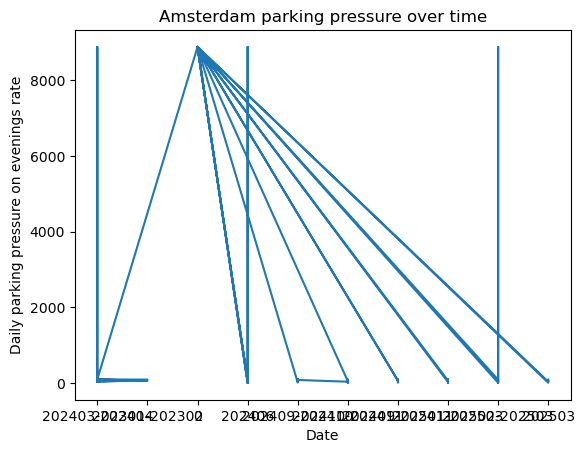

In [15]:
plt.figure()
plt.plot(gpdf01_1["Periode"], gpdf01_1["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [16]:
# 1) Add constant
X = sm.add_constant(gpdf01_1[["tmax"]])
y = gpdf01_1["bikes"]

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())


KeyError: "None of [Index(['tmax'], dtype='object')] are in the [columns]"

In [47]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir2 = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname2 = infodir2 + r'\data\KEA_db_green_and_gray_ngbhd_2023_03_trnsltd_only_AMS.csv'

gpdf02g = pd.read_csv(fname2)
#this is to verify
gpdf02g.head()

,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_built_area,perc_water_total,m2_water,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publcnt,m2_publc_green,perc_public_green,perc_publc_tree,perc_trnsn_total,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_other,...,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_green,perc_low_green,perc_tree,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,7,GM0363,Amsterdam,BU03631306,4427,Westergasfabriek,1,-99999999,0,99.999999,12.47,26504.03,255419.18,7.28,99685.39,68.27,10.31,44776.51,17.53,29.24,1.67,1.06,0.43,8.82,0.0,...,18382.65,18382.65,0.0,4.67,4.67,74683.12,2719.53,199.06,5333.44,50.53,18.01,32.52,39.09,0.0,0.0,0.0,4022.37,130.2,4152.57,0.0,0.0,130.49,0.23,3.28,3.60
1,45,GM0363,Amsterdam,BU03634709,4552,Duivelseiland,1,23729,1385,100.000003,4.97,2920.45,61646.98,34.69,23080.23,42.51,17.82,202.57,0.33,5.07,0.00,5.94,0.69,11.19,0.0,...,20876.45,20876.45,0.0,0.00,0.00,3126.23,3662.17,514.10,141.05,13.09,1.02,12.07,82.16,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.46,4.27,8.62
2,53,GM0363,Amsterdam,BU03634600,4539,Valeriusbuurt Oost,1,12248,1405,99.999996,4.55,4607.40,120651.50,32.67,38367.50,40.32,22.34,2521.47,2.09,8.52,0.12,8.73,1.51,12.10,0.0,...,38507.74,38507.74,0.0,0.00,0.00,10281.06,10538.49,906.86,879.44,22.33,3.60,18.73,73.85,0.0,0.0,0.0,144.76,0.0,144.76,0.0,0.0,0.00,1.25,1.37,1.83
3,90,GM0363,Amsterdam,BU03635301,4579,IJselbuurt Oost,1,21880,2900,99.999988,16.80,26146.56,159417.36,25.28,54516.32,40.28,17.55,2078.39,1.30,6.09,0.10,5.97,2.77,8.81,0.0,...,39400.79,39378.99,0.0,0.00,0.00,9703.89,9513.20,901.93,631.04,17.14,4.09,13.05,66.47,0.0,0.0,0.0,109.68,8.4,118.08,0.0,0.0,32.23,0.03,0.68,9.48
4,92,GM0363,Amsterdam,BU03639303,4774,F-buurt,1,20169,4465,100.000004,6.38,14141.01,233166.41,24.11,121287.55,56.32,13.12,12907.19,5.54,4.30,0.06,0.43,0.42,12.27,0.0,...,56080.41,56080.41,0.0,0.00,0.00,10036.16,1006.84,141.33,735.41,11.07,5.96,5.11,82.86,0.0,0.0,0.0,145.69,0.0,145.69,0.0,0.0,0.00,0.00,0.01,16.96


In [53]:
gpdf01["BRT_cln"] = gpdf01["BRT"].str[5:]
#this is to verify
gpdf01.head()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten,BRT_cln
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA,Planciusbuurt-Noord
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,AA,Westelijke eilanden
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,AA,Westerdokseiland
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,AA,Planciusbuurt-Zuid
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,AA,Haarlemmerbuurt-West


In [66]:
gpdf01 = gpdf01[["OBJECTNUMMER", "BRT_cln", "BRT"] + [col for col in gpdf01.columns if col not in ["BRT_cln", "BRT"]]]
gpdf01.head()

,OBJECTNUMMER,BRT_cln,BRT,OBJECTNUMMER,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten
0,117.0,Planciusbuurt-Noord,AA01 Planciusbuurt-Noord,117.0,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA
1,118.0,Westelijke eilanden,AA02 Westelijke eilanden,118.0,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,AA
2,119.0,Westerdokseiland,AA03 Westerdokseiland,119.0,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,AA
3,120.0,Planciusbuurt-Zuid,AA04 Planciusbuurt-Zuid,120.0,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,AA
4,121.0,Haarlemmerbuurt-West,AA05 Haarlemmerbuurt-West,121.0,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,AA


In [67]:
#we need to look for matches to ease the process in merging both data bases
matches = set(gpdf01["BRT_cln"]) & set(gpdf02g["ngbhd_name"])
num_matches = len(matches)
num_nomatch = len()
print(f"Number of matching values: {num_matches}")
print(f"Number of matching values: {}")

Number of matching values: 239


In [76]:
len(set(gpdf01["BRT_cln"]) - set(gpdf02g["ngbhd_name"]))

280

In [78]:
set(gpdf01["BRT_cln"]) - set(gpdf02g["ngbhd_name"])

{'Aalsmeerwegbuurt-Oost',
 'Aalsmeerwegbuurt-West',
 'Aetsveld-Noord',
 'Aetsveld-Zuid',
 'Aetsveldsepolder',
 'Ambonpleinbuurt',
 'Amstel III deel A/B-Noord',
 'Amstel III deel A/B-Zuid',
 'Amstel III deel C/D-Noord',
 'Amstel III deel C/D-Zuid',
 'Amstelkwartier-Noord',
 'Amstelkwartier-West',
 'Amstelkwartier-Zuid',
 'Anjeliersbuurt-Noord',
 'Anjeliersbuurt-Zuid',
 'Arondeusbuurt',
 'Baaibuurt-Oost',
 'Baaibuurt-West',
 'Bakemabuurt',
 'Banne-Noordoost',
 'Banne-Noordwest',
 'Banne-Zuidoost',
 'Banne-Zuidwest',
 'Bedrijventerrein Nijverheidslaan',
 'Bedrijventerrein Van Houten',
 'Bedrijventerrein-Noord Weesp',
 'Bellamybuurt-Noord',
 'Bellamybuurt-Zuid',
 'Bijlmermuseum-Noord',
 'Bijlmermuseum-Zuid',
 'Bloemenbuurt-Noord',
 'Bloemenbuurt-Zuid',
 'Botteskerkbuurt',
 'Bovendiep/Diemerpark',
 'Bretten-Oost',
 'Bretten-West',
 'Buiksloterdijk-Oost',
 'Buiksloterdijk-West',
 'Buiksloterham-Noord',
 'Buiksloterham-Zuid',
 'Buikslotermeer-Noord',
 'Buitenveldert-Oost-Midden',
 'Buitenveld

In [77]:
len(set(gpdf02g["ngbhd_name"]) - set(gpdf01["BRT_cln"]))

240

In [79]:
set(gpdf02g["ngbhd_name"]) - set(gpdf01["BRT_cln"])

{'Aalsmeerwegbuurt Oost',
 'Aalsmeerwegbuurt West',
 'Amstel III deel A/B Noord',
 'Amstel III deel A/B Zuid',
 'Amstel III deel C/D Noord',
 'Amstel III deel C/D Zuid',
 'Amstelkwartier Noord',
 'Amstelkwartier West',
 'Amstelkwartier Zuid',
 'Anjeliersbuurt Noord',
 'Anjeliersbuurt Zuid',
 'Baanakkerspark Noord',
 'Baanakkerspark Zuid',
 'Banne Noordoost',
 'Banne Noordwest',
 'Banne Zuidoost',
 'Banne Zuidwest',
 'Bedrijvengebied Cruquiusweg',
 'Bedrijventerrein Hamerstraat',
 'Bedrijventerrein Sloterdijk I',
 'Bellamybuurt Noord',
 'Bellamybuurt Zuid',
 'Bijlmermuseum Noord',
 'Bijlmermuseum Zuid',
 'Bloemenbuurt Noord',
 'Bloemenbuurt Zuid',
 'Bretten Oost',
 'Bretten West',
 'Buiksloterdijk Oost',
 'Buiksloterdijk West',
 'Buiksloterham',
 'Buikslotermeer Noord',
 'Buitenveldert Midden Zuid',
 'Buitenveldert Oost Midden',
 'Buitenveldert West Midden',
 'Buitenveldert Zuidoost',
 'Buitenveldert Zuidwest',
 'Burgemeester Tellegenbuurt Oost',
 'Burgemeester Tellegenbuurt West',
 'Bu

In [80]:
lhs = set(gpdf01["BRT_cln"])
rhs = set(gpdf02g["ngbhd_name"])

In [81]:
lhs & rhs

{'AMC',
 'Afrikahaven',
 'Alexanderplein e.o.',
 'Alfa-driehoek',
 'Amerikahaven',
 'Amstelglorie',
 'Amstelpark',
 'Amstelveldbuurt',
 'Amsterdamse Bos',
 'Amsterdamse Poort',
 'Andreasterrein',
 'Architectenbuurt',
 'BG-terrein e.o.',
 'Balboaplein e.o.',
 'Banpleinbuurt',
 'Beatrixpark',
 'Bedrijvencentrum Osdorp',
 'Bedrijvencentrum Westerkwartier',
 'Bedrijvengebied Veelaan',
 'Bedrijvengebied Zeeburgerkade',
 'Bedrijvenpark Lutkemeer',
 'Bedrijventerrein Landlust',
 'Bedrijventerrein Nieuwendammerdijk',
 'Bedrijventerrein Schinkel',
 'Beethovenbuurt',
 'Begijnhofbuurt',
 'Belgiëplein e.o.',
 'Bertelmanpleinbuurt',
 'Betondorp',
 'Blauwe Zand',
 'Bloemgrachtbuurt',
 'Borgerbuurt',
 'Borneo',
 'Bosleeuw',
 'Buiksloterbreek',
 'Buikslotermeerplein',
 'Buiteneiland',
 'Buyskade e.o.',
 'Calandlaan/Lelylaan',
 'Centrumeiland',
 'Circus/Kermisbuurt',
 'Columbusplein e.o.',
 'Concertgebouwbuurt',
 'Cornelis Schuytbuurt',
 'Cornelis Troostbuurt',
 'Czaar Peterbuurt',
 'D-buurt',
 'De Bon

In [85]:
len(lhs), len(rhs), len(lhs&rhs), len(lhs-rhs), len(rhs-lhs) #len(lhs+rhs)

(519, 479, 239, 280, 240)

In [88]:
#lhs = {s.replace("-", " ") for s in lhs}
rhs = {s.replace("-", " ") for s in rhs}

In [92]:
lhs={x for x in lhs if isinstance(x, str)}

In [93]:
lhs = {s.replace("-", " ") for s in lhs}

In [91]:
{x for x in set(gpdf01["BRT"]) if not isinstance(x, str)}

{nan}

In [94]:
len(lhs), len(rhs), len(lhs&rhs), len(lhs-rhs), len(rhs-lhs) #len(lhs+rhs)

(518, 479, 407, 111, 72)

In [95]:
lhs - rhs

{'Aetsveld Noord',
 'Aetsveld Zuid',
 'Aetsveldsepolder',
 'Ambonpleinbuurt',
 'Arondeusbuurt',
 'Baaibuurt Oost',
 'Baaibuurt West',
 'Bakemabuurt',
 'Bedrijventerrein Nijverheidslaan',
 'Bedrijventerrein Noord Weesp',
 'Bedrijventerrein Van Houten',
 'Botteskerkbuurt',
 'Bovendiep/Diemerpark',
 'Buiksloterham Noord',
 'Buiksloterham Zuid',
 'Buitenveldert Zuid Midden',
 'BurgemeesterTellegenbuurt West',
 'Coenhaven',
 'Confuciusbuurt',
 'Contactbuurt',
 'Cornelis Douwesterrein Oost',
 'Cornelis Douwesterrein West',
 'Coronelbuurt',
 'Cruquiusbuurt',
 'De Eendracht',
 'De Kameleon e.o.',
 'De Klomp',
 'Dichtersbuurt',
 'Dijkgraafpleinbuurt',
 'Dobbebuurt',
 'Dudokbuurt',
 'Ed Pelsterparkbuurt',
 'GWL terrein',
 'Geelvinckbuurt',
 'Gein 1',
 'Gein 2',
 'Gein 3',
 'Gein 4',
 'Hamerstraatkwartier Oost',
 'Hamerstraatkwartier West',
 'Havenkwartier IJburg',
 'Hemknoop Noord',
 'Hemknoop Zuid',
 'Herensingelkwartier',
 'Hogewey Midden',
 'Hogewey Noord',
 'Hogewey Zuid',
 'Holendrecht Zuid

In [96]:
rhs - lhs

{'Baanakkerspark Noord',
 'Baanakkerspark Zuid',
 'Bedrijvengebied Cruquiusweg',
 'Bedrijventerrein Hamerstraat',
 'Bedrijventerrein Sloterdijk I',
 'Buiksloterham',
 'Buitenveldert Midden Zuid',
 'Burgemeester Tellegenbuurt West',
 'Buurt 10',
 'Buurt 2',
 'Buurt 3',
 'Buurt 4 Oost',
 'Buurt 5 Noord',
 'Buurt 5 Zuid',
 'Buurt 6',
 'Buurt 7',
 'Buurt 8',
 'Buurt 9',
 'Coenhaven/Mercuriushaven',
 'Cornelis Douwesterrein',
 'De Heining',
 'De Punt',
 'Ecowijk',
 'Gaasperdam Noord',
 'Gaasperdam Zuid',
 'Gein Noordoost',
 'Gein Noordwest',
 'Gein Zuidoost',
 'Gein Zuidwest',
 'Gouden Bocht',
 'Haveneiland Noord',
 'Haveneiland Noordoost',
 'Haveneiland Noordwest',
 'Haveneiland Oost',
 'Haveneiland Zuidwest/Rieteiland West',
 'Jacques Veltmanbuurt',
 'Johannnes Vermeerbuurt',
 'K buurt Midden',
 'Louis Chrispijnbuurt',
 'Middeneiland Zuidoost',
 'Middeneiland Zuidwest',
 'Nieuwe Diep/Diemerpark',
 'Noordoostkwadrant Indische buurt',
 'Noordwestkwadrant Indische buurt Noord',
 'Noordwestkw

In [97]:
gpdf01 = gpdf01.dropna(subset=["BRT_cln"])

In [98]:
gpdf01["BRT_cln"] = gpdf01["BRT_cln"].str.replace("-", " ", regex=False)
gpdf02g["ngbhd_name"] = gpdf02g["ngbhd_name"].str.replace("-", " ", regex=False)

In [68]:
gpdf03mf = pd.merge(gpdf01, gpdf02g, left_on="BRT_cln", right_on="ngbhd_name", how="outer")
gpdf03mf.head(40)

,OBJECTNUMMER,BRT_cln,BRT,OBJECTNUMMER,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,...,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_green,perc_low_green,perc_tree,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,360.0,AMC,TA06 AMC,360.0,T,202406,doordeweeks avond,21.0,3.0,1.0,0.0,4.0,14.0,19.0,"POLYGON((4.9617449 52.2953793,4.9611556 52.296...","POLYGON((52.2953793 4.9617449,52.2960124 4.961...",4.956929,52.293033,TA,943.0,GM0363,Amsterdam,BU03639205,4769.0,AMC,...,102133.46,102133.46,0.0,0.00,0.00,180132.73,24438.47,346.14,11584.08,36.67,7.35,29.32,58.28,0.00,0.00,0.00,8885.16,10125.74,19010.90,0.00,0.00,18489.40,2.32,0.51,3.66
1,404.0,AMC,TA06 AMC,404.0,T,202406,doordeweeks middag,21.0,11.0,6.0,0.0,17.0,52.0,81.0,"POLYGON((4.9617449 52.2953793,4.9611556 52.296...","POLYGON((52.2953793 4.9617449,52.2960124 4.961...",4.956929,52.293033,TA,943.0,GM0363,Amsterdam,BU03639205,4769.0,AMC,...,102133.46,102133.46,0.0,0.00,0.00,180132.73,24438.47,346.14,11584.08,36.67,7.35,29.32,58.28,0.00,0.00,0.00,8885.16,10125.74,19010.90,0.00,0.00,18489.40,2.32,0.51,3.66
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2680.0,GM0363,Amsterdam,BU03634403,4534.0,Aalsmeerwegbuurt Oost,...,32752.98,32752.98,0.0,0.00,0.00,12078.13,4675.39,773.73,527.91,20.11,4.68,15.43,75.44,0.00,0.00,0.00,1338.35,28.61,1366.96,0.00,0.00,149.79,0.59,0.40,1.63
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916.0,GM0363,Amsterdam,BU03634402,4294.0,Aalsmeerwegbuurt West,...,31881.58,31881.58,0.0,0.00,0.00,12973.64,5901.41,808.90,491.15,23.06,3.88,19.18,70.45,0.00,0.00,0.00,73.14,0.00,73.14,0.00,0.00,0.00,0.01,0.00,0.25
4,1498.0,Aalsmeerwegbuurt-Oost,KA05 Aalsmeerwegbuurt-Oost,1498.0,K,202502-202503,doordeweeks avond,545.0,480.0,0.0,0.0,480.0,88.0,88.0,"POLYGON((4.8523654 52.3509495,4.8517535 52.351...","POLYGON((52.3509495 4.8523654,52.3510245 4.851...",4.849003,52.348521,KA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1572.0,Aalsmeerwegbuurt-Oost,KA05 Aalsmeerwegbuurt-Oost,1572.0,K,202502-202503,doordeweeks middag,543.0,399.0,0.0,0.0,399.0,73.0,73.0,"POLYGON((4.8523654 52.3509495,4.8517535 52.351...","POLYGON((52.3509495 4.8523654,52.3510245 4.851...",4.849003,52.348521,KA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1497.0,Aalsmeerwegbuurt-West,KA04 Aalsmeerwegbuurt-West,1497.0,K,202502-202503,doordeweeks avond,521.0,473.0,1.0,0.0,474.0,91.0,91.0,"POLYGON((4.8494407 52.3516047,4.8455507 52.351...","POLYGON((52.3516047 4.8494407,52.351581 4.8455...",4.847504,52.349202,KA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1571.0,Aalsmeerwegbuurt-West,KA04 Aalsmeerwegbuurt-West,1571.0,K,202502-202503,doordeweeks middag,514.0,386.0,1.0,0.0,387.0,75.0,75.0,"POLYGON((4.8494407 52.3516047,4.8455507 52.351...","POLYGON((52.3516047 4.8494407,52.351581 4.8455...",4.847504,52.349202,KA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1786.0,Aetsveld-Noord,SE03 Aetsveld-Noord,1786.0,S,202503,doordeweeks avond,766.0,588.0,27.0,0.0,615.0,77.0,80.0,"POLYGON((5.0469992 52.3015335,5.0468562 52.301...","POLYGON((52.3015335 5.0469992,52.3015888 5.046...",5.042458,52.300397,SE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1809.0,Aetsveld-Noord,S

In [65]:
matched = gpdf03m[gpdf03m['BRT_cln'].notna() & gpdf03m['ngbhd_name'].notna()]
print(matched.head(10))

                BRT_cln                       BRT  OBJECTNUMMER SDC        Periode             Dagdeel  Cap_open  \
0                   AMC                  TA06 AMC         360.0   T         202406   doordeweeks avond      21.0   
1                   AMC                  TA06 AMC         404.0   T         202406  doordeweeks middag      21.0   
14          Afrikahaven          BA01 Afrikahaven         492.0   B         202406   doordeweeks avond      38.0   
15          Afrikahaven          BA01 Afrikahaven         503.0   B         202406  doordeweeks middag      51.0   
16  Alexanderplein e.o.  AJ04 Alexanderplein e.o.         172.0   A  202403-202404   doordeweeks avond      88.0   
17  Alexanderplein e.o.  AJ04 Alexanderplein e.o.         238.0   A  202403-202404  doordeweeks middag      88.0   
18        Alfa-driehoek        BB07 Alfa-driehoek         527.0   B              0   doordeweeks avond       0.0   
19        Alfa-driehoek        BB07 Alfa-driehoek         528.0   B     

In [99]:
gpdf03mp = pd.merge(gpdf01, gpdf02g, left_on="BRT_cln", right_on="ngbhd_name", how="inner")
gpdf03mp.head(40)

,OBJECTNUMMER,BRT_cln,BRT,OBJECTNUMMER,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,...,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_green,perc_low_green,perc_tree,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,117.0,Planciusbuurt Noord,AA01 Planciusbuurt-Noord,117.0,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA,8321,GM0363,Amsterdam,BU03630505,4307,Planciusbuurt Noord,...,4863.26,4863.26,0.0,0.00,0.00,1146.29,373.02,3.32,83.11,8.10,1.48,6.62,66.08,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.68,2.41,2.61
1,118.0,Westelijke eilanden,AA02 Westelijke eilanden,118.0,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,AA,10331,GM0363,Amsterdam,BU03630503,4306,Westelijke eilanden,...,63131.51,63100.81,0.0,0.00,0.00,10619.33,4018.56,809.42,2413.65,10.35,2.07,8.28,58.66,0.0,0.0,0.0,439.91,41.9,481.81,0.0,0.00,139.58,0.66,2.76,4.66
2,119.0,Westerdokseiland,AA03 Westerdokseiland,119.0,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,AA,6379,GM0363,Amsterdam,BU03630500,4284,Westerdokseiland,...,38893.64,38893.64,0.0,1.85,1.85,2311.40,289.51,75.24,222.04,1.31,0.39,0.92,44.97,0.0,0.0,0.0,7045.42,4.6,7050.02,0.0,0.00,212.68,0.03,0.08,0.00
3,120.0,Planciusbuurt Zuid,AA04 Planciusbuurt-Zuid,120.0,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,AA,2022,GM0363,Amsterdam,BU03630506,4308,Planciusbuurt Zuid,...,2523.28,2523.28,0.0,0.00,0.00,1310.54,47.75,29.60,393.75,11.76,1.57,10.19,60.54,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.01,0.01,2.25
4,121.0,Haarlemmerbuurt West,AA05 Haarlemmerbuurt-West,121.0,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,AA,2787,GM0363,Amsterdam,BU03630502,4303,Haarlemmerbuurt West,...,50447.89,50331.89,9.7,17.72,8.02,4132.55,1829.60,683.63,638.86,6.91,0.68,6.23,86.12,0.0,0.0,0.0,964.56,28.6,993.16,0.0,30.32,34.93,0.30,0.09,0.33
5,122.0,Haarlemmerbuurt Oost,AA06 Haarlemmerbuurt-Oost,122.0,A,202403-202404,doordeweeks avond,121.0,110.0,1.0,0.0,111.0,91.0,92.0,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,AA,12226,GM0363,Amsterdam,BU03630501,4290,Haarlemmerbuurt Oost,...,38654.85,38618.85,0.0,0.00,0.00,9244.62,2419.64,380.47,1383.14,14.70,0.91,13.79,77.96,0.0,0.0,0.0,1223.91,4.4,1228.31,0.0,0.00,678.06,0.35,2.02,0.58
6,123.0,Marnixbuurt Noord,AB01 Marnixbuurt-Noord,123.0,A,202403-202404,doordeweeks avond,169.0,137.0,1.0,0.0,138.0,81.0,82.0,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,AB,2861,GM0363,Amsterdam,BU03630603,4373,Marnixbuurt Noord,...,18840.91,18840.91,0.0,0.00,0.00,5134.30,867.70,104.16,1334.97,12.98,2.72,10.26,64.65,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.27,0.15,0.19
7,124.0,Driehoekbuurt,AB02 Driehoekbuurt,124.0,A,202403-202404,doordeweeks avond,312.0,266.0,3.0,0.0,269.0,85.0,86.0,"POLYGON((4.8829591 52.3836506,4.8803612 52.379...","POLYGON((52.3836506 4.8829591,52.37958

In [101]:
len(set(gpdf03mp['BRT_cln']))==len(set(gpdf03mp['ngbhd_name']))

True

In [72]:
#here i am dropping all entries that do not have "doordeweeks avond" in "Dagdeel"
#and checking how many I have left
gpdf03mp_1 = gpdf03mp[gpdf03mp['Dagdeel'] == 'doordeweeks avond']
before = len(gpdf03mp)
after = len(gpdf03mp_1)
print(f"Rows before: {before}, after: {after}, dropped: {before - after}")

Rows before: 242, after: 242, dropped: 0


In [73]:
#here i am purging all rows with "netto_pkd" and "bruto_pkd" higher than 150% because that looks like missing and damaged data
#that would otherwise interfere with our next process
gpdf03mp_2 = gpdf03mp_1[(gpdf03mp_1["Netto_PKD"] <= 150) & (gpdf03mp_1["Bruto_PKD"] <= 150)]
gpdf03mp_2.head(10)

,OBJECTNUMMER,BRT_cln,BRT,OBJECTNUMMER,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,...,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_green,perc_low_green,perc_tree,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,118.0,Westelijke eilanden,AA02 Westelijke eilanden,118.0,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,AA,10331,GM0363,Amsterdam,BU03630503,4306,Westelijke eilanden,...,63131.51,63100.81,0.0,0.00,0.00,10619.33,4018.56,809.42,2413.65,10.35,2.07,8.28,58.66,0.0,0.0,0.0,439.91,41.9,481.81,0.0,0.0,139.58,0.66,2.76,4.66
1,119.0,Westerdokseiland,AA03 Westerdokseiland,119.0,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,AA,6379,GM0363,Amsterdam,BU03630500,4284,Westerdokseiland,...,38893.64,38893.64,0.0,1.85,1.85,2311.40,289.51,75.24,222.04,1.31,0.39,0.92,44.97,0.0,0.0,0.0,7045.42,4.6,7050.02,0.0,0.0,212.68,0.03,0.08,0.00
2,124.0,Driehoekbuurt,AB02 Driehoekbuurt,124.0,A,202403-202404,doordeweeks avond,312.0,266.0,3.0,0.0,269.0,85.0,86.0,"POLYGON((4.8829591 52.3836506,4.8803612 52.379...","POLYGON((52.3836506 4.8829591,52.37958 4.88036...",4.884213,52.381615,AB,10346,GM0363,Amsterdam,BU03630600,4309,Driehoekbuurt,...,47986.11,47986.11,0.0,29.00,29.00,3409.63,4170.14,539.75,665.71,9.85,1.55,8.30,82.73,0.0,0.0,0.0,402.91,0.0,402.91,0.0,0.0,0.00,0.00,0.00,7.39
3,126.0,Zaagpoortbuurt,AB04 Zaagpoortbuurt,126.0,A,202403-202404,doordeweeks avond,158.0,85.0,2.0,0.0,87.0,54.0,55.0,"POLYGON((4.8791773 52.3777046,4.8786863 52.377...","POLYGON((52.3777046 4.8791773,52.3778162 4.878...",4.877343,52.376228,AB,4462,GM0363,Amsterdam,BU03630604,4378,Zaagpoortbuurt,...,12289.34,12289.34,0.0,0.00,0.00,3486.33,222.48,67.88,1112.26,13.60,0.64,12.96,81.71,0.0,0.0,0.0,8.10,4.4,12.50,0.0,0.0,54.89,0.00,0.00,1.00
4,129.0,Bloemgrachtbuurt,AB07 Bloemgrachtbuurt,129.0,A,202403-202404,doordeweeks avond,201.0,173.0,1.0,0.0,174.0,86.0,87.0,"POLYGON((4.8847738 52.3765284,4.8844659 52.376...","POLYGON((52.3765284 4.8847738,52.3766032 4.884...",4.880541,52.374458,AB,6272,GM0363,Amsterdam,BU03630602,4372,Bloemgrachtbuurt,...,64579.46,64548.36,0.0,0.00,0.00,4796.78,3040.00,996.21,3029.81,10.42,1.10,9.32,80.53,0.0,0.0,0.0,338.17,2.9,341.07,0.0,0.0,2.30,0.00,0.03,3.34
5,130.0,Groenmarktkadebuurt,AB08 Groenmarktkadebuurt,130.0,A,202403-202404,doordeweeks avond,15.0,14.0,0.0,0.0,14.0,93.0,93.0,"POLYGON((4.8763085 52.3723126,4.8753522 52.372...","POLYGON((52.3723126 4.8763085,52.3720811 4.875...",4.876394,52.370407,AB,10838,GM0363,Amsterdam,BU03630608,4377,Groenmarktkadebuurt,...,6202.37,6202.37,0.0,0.00,0.00,1774.56,556.63,38.22,1273.49,9.95,0.40,9.55,63.62,0.0,0.0,0.0,4918.60,31.8,4950.40,0.0,0.0,1129.76,0.06,0.07,0.35
6,132.0,Elandsgrachtbuurt,AB10 Elandsgrachtbuurt,132.0,A,202403-202404,doordeweeks avond,287.0,250.0,1.0,0.0,251.0,87.0,87.0,"POLYGON((4.8830631 52.3739901,4.8763085 52.372...","POLYGON((52.3739901 4.8830631,52.3723126 4.876...",4.879618,52.370867,AB,6784,GM0363,Amsterdam,BU03630606,4375,Elandsgrachtbuurt,...,105040.96,104978.26,0.0,0.00,0.00,6170.33,9009.01,2099.89,2862.72,12.21,2.12,10.09,80.35,0.0,0.0,0.0,2580.08,54.4,2634.48,0.0,0.0,845.80,0.28,1.73,7.21
7,133.0,Passeerdersgrachtbuurt,AB11 Passeerdersgrachtbuurt,133.0,A,202403-202404,doordeweeks avond,62.0,54.0,0.0,0.0,54.0,87.0,87.0,"POLYGON((4.8825976 52.3687543,4.8822748 52.368...","POLYGON((52.3687543 4.8825976,52.3687657 4.882...

In [74]:
gpdf03mp_2 = gpdf03mp_2.sort_values(by=["Bruto_PKD", "Netto_PKD"], ascending=[False, False])
gpdf03mp_2.head(10)

,OBJECTNUMMER,BRT_cln,BRT,OBJECTNUMMER,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,...,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_green,perc_low_green,perc_tree,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
14,143.0,Oude Kerk e.o.,AE02 Oude Kerk e.o.,143.0,A,202301-202302,doordeweeks avond,8.0,7.0,2.0,0.0,9.0,88.0,112.0,"POLYGON((4.8994004 52.3747475,4.8992273 52.374...","POLYGON((52.3747475 4.8994004,52.3747876 4.899...",4.896203,52.373811,AE,8200,GM0363,Amsterdam,BU03630001,4368,Oude Kerk e.o.,...,56357.71,56357.71,0.0,0.00,0.00,1698.59,516.91,157.39,335.85,3.12,0.19,2.93,93.11,0.00,0.00,0.00,3573.38,0.70,3574.08,0.0,0.0,0.00,0.33,0.77,1.11
56,376.0,Grunder/Koningshoef,TF02 Grunder/Koningshoef,376.0,T,202406,doordeweeks avond,425.0,416.0,24.0,0.0,440.0,98.0,104.0,"POLYGON((4.9769028 52.3238067,4.977699 52.3229...","POLYGON((52.3238067 4.9769028,52.3229333 4.977...",4.980608,52.321355,TF,10916,GM0363,Amsterdam,BU03639408,4793,Grunder/Koningshoef,...,32976.31,32976.31,0.0,0.00,0.00,6018.53,196.33,0.60,25.51,9.41,4.66,4.75,81.96,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1.58,2.23,3.74
72,545.0,Zeeheldenbuurt,EB08 Zeeheldenbuurt,545.0,E,202409-202410,doordeweeks avond,212.0,205.0,7.0,0.0,212.0,97.0,100.0,"POLYGON((4.8856593 52.3907556,4.8855179 52.390...","POLYGON((52.3907556 4.8856593,52.3904709 4.885...",4.888207,52.389442,EB,650,GM0363,Amsterdam,BU03631300,4422,Zeeheldenbuurt,...,31988.21,31956.71,0.0,0.00,0.00,5397.20,3187.23,101.31,250.94,11.54,2.91,8.63,76.06,0.00,0.00,0.00,5.65,0.20,5.85,0.0,0.0,1.83,0.04,0.06,0.24
15,144.0,Nes e.o.,AE04 Nes e.o.,144.0,A,202403-202404,doordeweeks avond,15.0,14.0,1.0,0.0,15.0,93.0,100.0,"POLYGON((4.8958708 52.3718586,4.8948152 52.372...","POLYGON((52.3718586 4.8958708,52.3721977 4.894...",4.893940,52.370878,AE,798,GM0363,Amsterdam,BU03630003,4323,Nes e.o.,...,31219.57,31219.57,0.0,0.00,0.00,536.01,0.56,0.00,357.68,1.78,0.04,1.74,92.25,0.00,0.00,0.00,1945.63,0.00,1945.63,0.0,0.0,107.79,0.10,0.02,0.09
125,838.0,Zwarte Gouw,NQ07 Zwarte Gouw,838.0,N,202410-202411,doordeweeks avond,4.0,2.0,2.0,0.0,4.0,50.0,100.0,"POLYGON((4.9846267 52.3937546,4.9845077 52.393...","POLYGON((52.3937546 4.9846267,52.3938034 4.984...",4.978053,52.388591,NQ,10581,GM0363,Amsterdam,BU03637304,4675,Zwarte Gouw,...,6332.79,6332.79,0.0,0.00,0.00,3414.05,10500.88,125.49,2687.33,24.06,18.33,5.73,22.83,597835.07,1297316.25,699481.18,14461.90,7076.57,21538.47,1604.8,0.0,381.27,0.05,0.01,0.98
58,381.0,Gooise Kant,TH01 Gooise Kant,381.0,T,202406,doordeweeks avond,216.0,191.0,23.0,0.0,214.0,88.0,99.0,"POLYGON((4.9649412 52.3170395,4.9644085 52.316...","POLYGON((52.3170395 4.9649412,52.3168807 4.964...",4.968765,52.312517,TH,10212,GM0363,Amsterdam,BU03639411,4798,Gooise Kant,...,10145.68,10145.68,0.0,6.24,6.24,8957.16,0.00,0.00,1766.09,19.40,12.48,6.92,68.28,0.00,0.00,0.00,6563.28,3.80,6567.08,0.0,0.0,0.00,0.06,0.09,4.20
55,372.0,E-buurt,TE01 E-buurt,372.0,T,202406,doordeweeks avond,580.0,496.0,76.0,0.0,572.0,86.0,99.0,"POLYGON((4.9714808 52.3253526,4.9711422 52.325...","POLYGON((52.3253526 4.9714808,52.3257034 4.971...",4.964116,52.324488,TE,10849,GM0363,Amsterdam,BU03639400,4784,E-buurt,...,43674.11,43674.11,0.0,4.97,4.97,35106.14,140.63,15.08,1000.15,24.10,12.75,11.35,72.11,0.00,0.00,0.00,472.47,151.60,624.07,0.0,0.0,170.51,0.13,0.54,0.65
85,577.0,Jan Maijenbuurt,EK03 Jan Maijenbuurt,577.0,E,202409-202410,doordeweeks avond,260.0,251.0,0.0,0.0,251.0,97.0,97.0,"POLYGON((4.8524111 52.3733998,4.8511174 52.373...","POLYGON((52.3733998 4.8524111,52.3731711 4.851...",4.851281,52.371718,EK,1207,GM0363,Amsterdam,BU03634101,4527,Jan Maijenbuurt,...,2783

In [ ]:
gpdf03mp_3 = gpdf03mp_3.drop(columns=['OBJID', 'ngbhd_code', 'perc_other', 'perc_publcnt', 'perc_trnsn_total', 'perc_publcnt_tree',
                                      'perc_publcnt_green', 'perc_publcnt_greennt', 'perc_built_tree', 'perc_built_green', 'perc_built_greennt',
                                      'perc_other_tree', 'perc_other_green', 'perc_other_greennt', 'perc_trnsn_tree', 'perc_trnsn_green',
                                      'perc_trnsn_greennt', 'perc_water', 'perc_water_tree', 'm2_ngbhd_pls_agrct', 'm2_publicnt_green',
m2_publicnt
m2_publcnt_greennt
    m2_publicnt_green
m2_publicnt
m2_publcnt_greennt
m2_built_envmt_green
m2_built_envmt
m2_built_envmt_greennt
m2_water
m2_agrct_green
m2_agrct
m2_agrct_greennt
m2_green_other
m2_other_surfc
m2_other_greennt
m2_green_trnsn
m2_trnsn
m2_trnsn_greennt
m2_tree_publc
m2_tree_publcnt
m2_tree_built_envmt
m2_tree_water
m2_agrct_tree
m2_tree_other
m2_tree_trnsn
    perc_built_gray
    mnpty_code
mnpty_name
    pop_dnsty_km2
qty_inhbt
perc_built_area
])
print(gpdf03mp_3.head())

In [ ]:
gpdf03mp_2 = gpdf03mp_2.sort_values(by=["Bruto_PKD", "Netto_PKD"], ascending=[False, False])
gpdf03mp_2.head(10)